In [55]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
from qiskit_aer import Aer

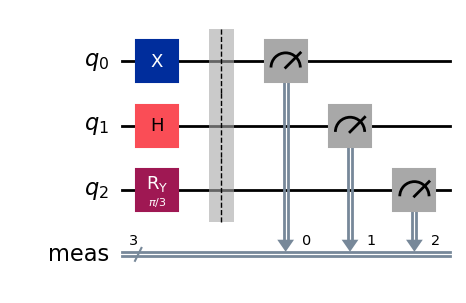

In [56]:
circuit = QuantumCircuit(3)

##### YOUR CODE GOES HERE #####
circuit.x(0)
circuit.h(1)
circuit.ry(theta=pi/3, qubit=2)
# circuit.h(2)
# circuit.t(2)
# circuit.h(2)

circuit.measure_all()
circuit.draw(output='mpl')

In [57]:
from qiskit.quantum_info import Statevector
state_circuit = circuit.copy()
state_circuit.remove_final_measurements()  # no measurements allowed
statevector = Statevector(state_circuit)
array_to_latex(statevector)

<IPython.core.display.Latex object>

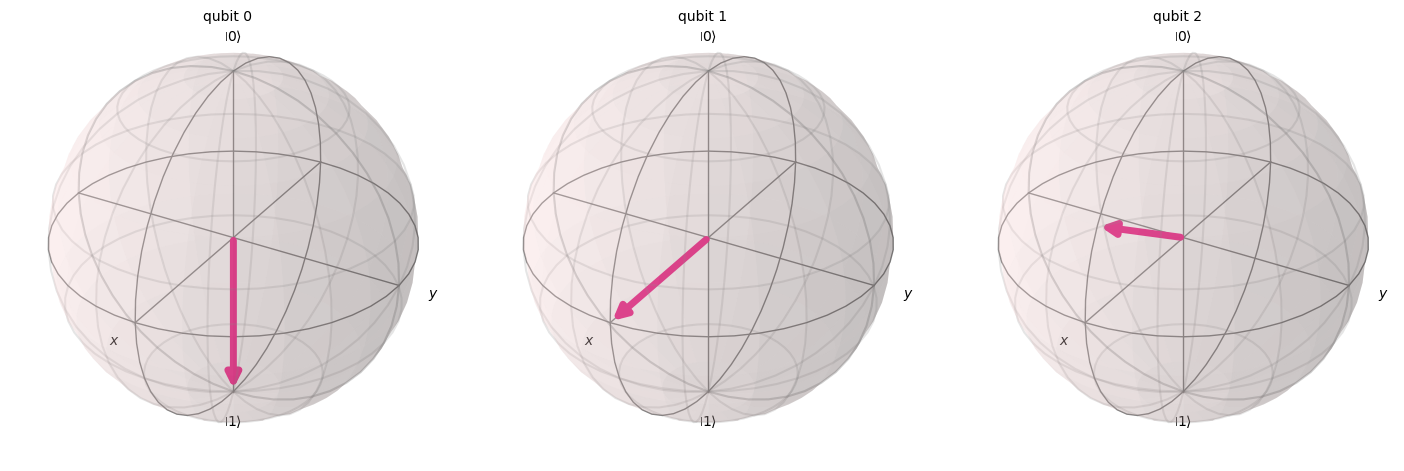

In [58]:
plot_bloch_multivector(statevector)

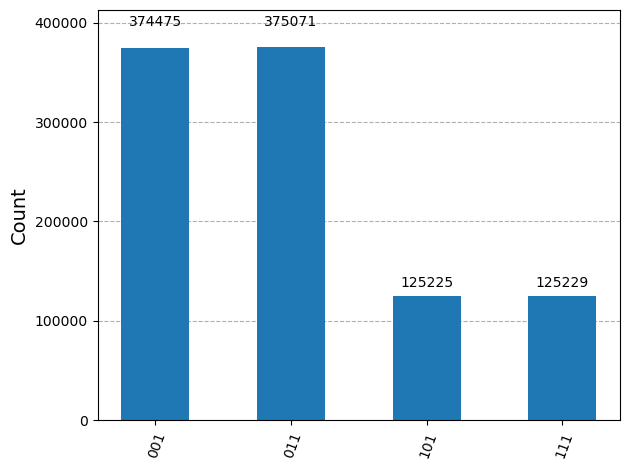

In [59]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1000000).result()
plot_histogram(result.get_counts())